Podatki so shranjeni v dveh tabelah. Prva tabela vsebuje id restavracije, ime restavracije, mesto in državo, v kateri se restavracija nahaja, oceno restavracije od 1 do 5, število ocen in cenovni razred od 1 do 4. Druga tabela vsebuje id restavracije in njen tip. Podatke je potrebno shraniti v dveh različnih tabelah, ker ima lahko posamezna restavracija več različnih tipov.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20
%matplotlib inline

restavracije = pd.read_csv('tabela_restavracij.csv')
tipi = pd.read_csv('tabela_tipov.csv')

In [4]:
restavracije

,id,Ime restavracije,Mesto,Država,Ocena,Število ocen,Cena
0,1,Adelaide Central Market,Adelaide,AUSTRALIA,4.5,77,1
1,2,Jamie’s Italian,Adelaide,AUSTRALIA,3.0,68,2
2,3,Bread & Bone Wood Grill,Adelaide,AUSTRALIA,4.0,52,2
3,4,Burger Theory,Adelaide,AUSTRALIA,3.5,45,1
4,5,Etica Ethical Pizzeria & Mozzarella Bar,Adelaide,AUSTRALIA,4.5,42,2
5,6,Press Food & Wine,Adelaide,AUSTRALIA,4.0,42,3
6,7,Hey Jupiter,Adelaide,AUSTRALIA,4.0,40,2
7,8,Cafe Troppo,Adelaide,AUSTRALIA,4.0,41,1
8,9,Coffee Branch,Adelaide,AUSTRALIA,4.5,38,1
9,10,Mandoo,Adelaide,AUSTRALIA,4.5,41,2


In [5]:
tipi

,id,Tip restavracije
0,1,Food Court
1,1,Fruits & Veggies
2,1,Health Markets
3,2,Italian
4,3,American (Traditional)
5,3,Burgers
6,4,Burgers
7,4,American (Traditional)
8,4,Street Vendors
9,5,Italian


Najprej nas zanima, katere restavracije so najboljše. Od restavracij, ki so dobile najvišjo možno oceno 5, si poglejmo najcenejše.

In [11]:
restavracije[(restavracije.Ocena == 5.0) & (restavracije['Število ocen'] > 50)].sort_values('Cena', ascending=True)

,id,Ime restavracije,Mesto,Država,Ocena,Število ocen,Cena
2790,2791,Juana La Cubana Cafe,Fort Lauderdale,FL,5.0,388,1
7260,7261,Blues City Deli,Saint Louis,MO,5.0,618,1
4057,4058,Manteigaria,Lisboa,PORTUGAL,5.0,145,1
4432,4433,Yummy Pollo,Louisville,KY,5.0,239,1
7195,7196,Pane & Vino,Roma,ITALY,5.0,80,1
9218,9219,King Mediterrano,Torrance,CA,5.0,728,1
6923,6924,King Mediterrano,Redondo Beach,CA,5.0,734,1
580,581,Aviva by Kameel,Atlanta,GA,5.0,708,2
9102,9103,Little Miss BBQ,Tempe,AZ,5.0,1116,2
9003,9004,Mocotó,São Paulo,BRAZIL,5.0,74,2


Vsaka restavracija spada v določen cenovni razred od 1 do 4 in vsak gost lahko oceni restavracijo z 1 do 5 zvezdicami. Zanima nas, ali cena restavracije vpliva na višino ocene. Za vsak cenovni razred izračunamo povprečno oceno.

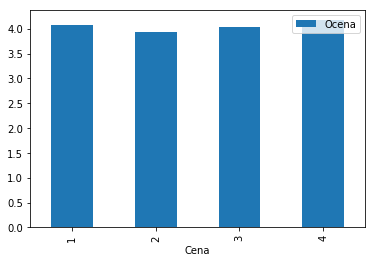

In [15]:
po_ceni = restavracije[['Ocena', 'Cena']].groupby('Cena').mean()
po_ceni.plot(kind='bar')

Zanima nas kateri tipi restavracij so najpogostejši:

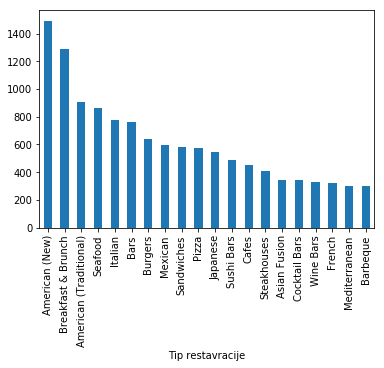

In [18]:
sestavljena = pd.merge(restavracije, tipi)
pogostost = sestavljena.groupby('Tip restavracije').count()['id'].sort_values(ascending=False)
pogostost[:20].plot.bar(x='Tip restavracije')

Poleg tega nas zanima tudi zastopanost tipov v posameznih državah. Kateri tip restavracije je na primer v posamezni državi najbolj zastopan?

In [54]:
zastopanost_tipov = sestavljena.groupby(['Država', 'Tip restavracije']).size()
matrika_zastopanosti = zastopanost_tipov.unstack()
zastopanost = matrika_zastopanosti.idxmax(axis=1)
tabela_zastopanosti = pd.DataFrame({'Država':zastopanost.index, 'Tip':zastopanost.values})
tabela_zastopanosti

,Država,Tip
0,ARGENTINA,Argentine
1,AUSTRALIA,Bars
2,AUSTRIA,Austrian
3,AZ,American (New)
4,BELGIUM,Belgian
5,BRAZIL,Brazilian
6,CA,American (New)
7,CANADA,Canadian (New)
8,CHILE,Chilean
9,CO,American (New)


Restavracije so najdražje v Čilu in najcenejše na Japonskem. Najbolje so bile ocenjene na Japonskem, najslabše pa v ameriški zvezni državi New Jersey.

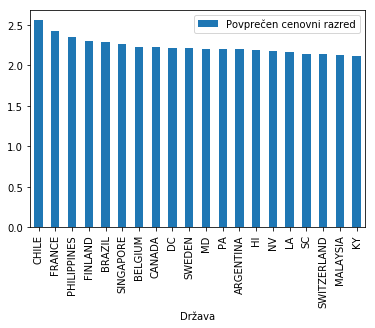

In [36]:
po_drzavah1 = restavracije.groupby('Država').mean()['Cena'].sort_values(ascending=False)[:20]
tabela_po_drzavah1 = pd.DataFrame({'Država':po_drzavah1.index, 'Povprečen cenovni razred':po_drzavah1.values})
tabela_po_drzavah1.plot.bar(x='Država')

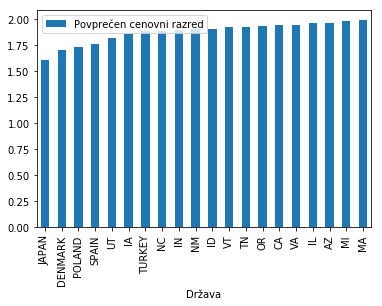

In [38]:
po_drzavah2 = restavracije.groupby('Država').mean()['Cena'].sort_values(ascending=True)[:20]
tabela_po_drzavah2 = pd.DataFrame({'Država':po_drzavah2.index, 'Povprečen cenovni razred':po_drzavah2.values})
tabela_po_drzavah2.plot.bar(x='Država')

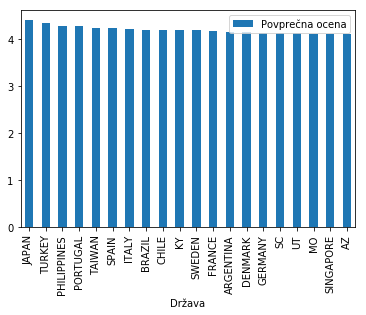

In [39]:
po_drzavah3 = restavracije.groupby('Država').mean()['Ocena'].sort_values(ascending=False)[:20]
tabela_po_drzavah3 = pd.DataFrame({'Država':po_drzavah3.index, 'Povprečna ocena':po_drzavah3.values})
tabela_po_drzavah3.plot.bar(x='Država')

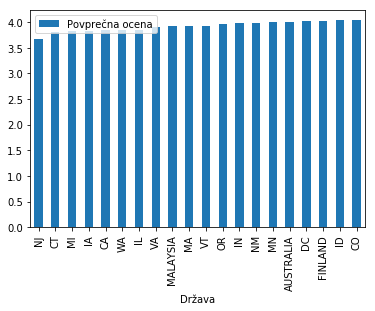

In [40]:
po_drzavah4 = restavracije.groupby('Država').mean()['Ocena'].sort_values(ascending=True)[:20]
tabela_po_drzavah4 = pd.DataFrame({'Država':po_drzavah4.index, 'Povprečna ocena':po_drzavah4.values})
tabela_po_drzavah4.plot.bar(x='Država')

Najbolje ocenjeni in najdražji tipi restavracij:

In [9]:
ocene_tipov = sestavljena.groupby('Tip restavracije').mean()['Ocena'].sort_values(ascending=False)
ocene_tipov[:20]

Tip restavracije
Yakiniku            4.80
Horumon             4.75
Imported Food       4.75
Kaiseki             4.50
Dumplings           4.50
Tablao Flamenco     4.50
Syrian              4.50
Friterie            4.50
Fruits & Veggies    4.50
Galician            4.50
Georgian            4.50
Guest Houses        4.50
Hawker Centre       4.50
South African       4.50
Soba                4.50
Hostels             4.50
Custom Cakes        4.50
Internet Cafes      4.50
Shopping            4.50
Kopitiam            4.50
Name: Ocena, dtype: float64

In [10]:
cenovni_razredi_tipov = sestavljena.groupby('Tip restavracije').mean()['Cena'].sort_values(ascending=False)
cenovni_razredi_tipov[:20]

Tip restavracije
Rodizios                3.666667
Dinner Theater          3.500000
Lumbard                 3.000000
Sardinian               3.000000
Northern German         3.000000
Speakeasies             3.000000
Guest Houses            3.000000
Oaxacan                 3.000000
Nikkei                  3.000000
Cooking Schools         3.000000
Tablao Flamenco         3.000000
Arroceria / Paella      3.000000
Wine Tasting Classes    3.000000
Nightlife               3.000000
Chilean                 2.888889
Hotels                  2.833333
Steakhouses             2.807317
Performing Arts         2.800000
Fondue                  2.769231
Modern Australian       2.764706
Name: Cena, dtype: float64

Ordinatna os predstavlja število restavracij posameznega tipa, abscisna os pa povprečno oceno restavracij posameznega tipa restavracije. Vidimo, da so bili najpogostejši tipi ocenjeni z oceno okrog 4.

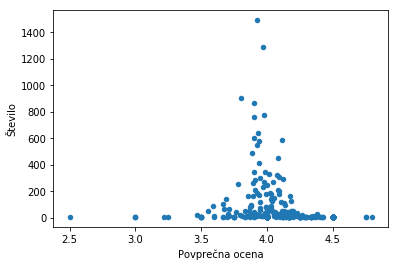

In [11]:
tabela_ocen_tipov = pd.DataFrame({'Tip restavracije':ocene_tipov.index, 'Povprečna ocena':ocene_tipov.values})
tabela_pogostosti = pd.DataFrame({'Tip restavracije':pogostost.index, 'Število':pogostost.values})
pd.merge(tabela_ocen_tipov, tabela_pogostosti).sort_values('Število', ascending=False).plot.scatter(x='Povprečna ocena', y='Število')